In [29]:
from new import potential_stems
from client import Chartmetric
from config import chartmetric_token
import pandas as pd
from tqdm import tqdm
import time

In [30]:
cm = Chartmetric(chartmetric_token)

In [31]:
df = pd.DataFrame(potential_stems.split('\n'))
df.rename(columns = {0: "ISRC"}, inplace=True)
df = df.loc[df["ISRC"] != ""]


In [32]:
isrc_dict = {}
searches = {}
for test in tqdm(df.ISRC):
    searches[test] = cm.search(test.strip())
    time.sleep(4)


100%|██████████| 32/32 [06:37<00:00, 16.68s/it]

In [37]:
final = searches
def get_cm_id(search_dict):
    isrc_dict = {}
    for k, v in search_dict.items():
        try:
            obj_ind = v['obj']
            if not obj_ind['tracks']:
                pass
            else:
                cm_id = obj_ind['tracks'][0]['id']
                name_of_song = v["obj"]["tracks"][0]["name"]
                isrc_dict[name_of_song] = dict(cm_id=cm_id, isrc=k)
    #         time.sleep(5)
        except TypeError:
            print(f'{k} not found')
#             time.sleep(5)

    return isrc_dict
new_stuff = get_cm_id(final)

USWV40600029 not found
USC4R1601970 not found
USC4R1802519 not found
USC4R1802397 not found
USC4R1702105 not found


In [38]:
song_data_dict = {}
for k, v in tqdm(new_stuff.items()):
    song_data_dict[k] = cm.track(str(v['cm_id']))
    time.sleep(4)


100%|██████████| 27/27 [03:36<00:00,  8.89s/it]

In [40]:
song_data_dict.keys()

dict_keys(['Roma Fade', 'Wrecking Ball', 'Gook', 'ULT', 'Good Night', 'Bring Me To Life', 'Going Under', 'High', 'Masters', 'The Only Heirs', 'KILL4ME', 'Killing Strangers', 'The Devil Beneath My Feet', 'Just The Way You Are', 'Country Song', 'Fake It - Clean (little) Version', 'Remedy', 'Pills', 'MANIFEST', 'WHERE THE SKIES END', 'My Demons', 'Ricochet', 'Satellite', 'Just Dancing', 'Radio', 'The Glow', "Ain't It Fun"])

In [52]:
def get_statistics(song_dict):
    stats_dict = {}

    for k, v in song_dict.items():
        stats_dict[k] = v['obj']['cm_statistics']
        
    return stats_dict
lol = get_statistics(song_data_dict)

In [67]:
hehe = pd.DataFrame(lol).T
hehe.head()

,de_playlist_total_reach,num_am_editorial_playlists,num_am_playlists,num_az_editorial_playlists,num_az_playlists,num_de_editorial_playlists,num_de_playlists,num_sp_editorial_playlists,num_sp_playlists,num_yt_editorial_playlists,num_yt_playlists,sp_playlist_total_reach,sp_popularity,yt_playlist_total_reach
Roma Fade,32881,0,2,0,0,0,2,0,157,0,0,32010,28,None
Wrecking Ball,None,0,1,0,0,0,0,0,164,0,0,452375,19,None
Gook,None,0,1,0,0,0,0,1,346,0,0,364395,56,None
ULT,653,0,4,0,0,0,2,1,614,0,0,495734,58,None
Good Night,None,0,2,0,0,0,0,1,343,0,0,342606,53,None


In [62]:
import seaborn as sns

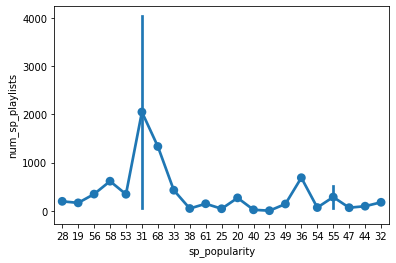

In [69]:
sns.pointplot(data = hehe, x='sp_popularity', y='num_sp_playlists')